In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Loading Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Setting columns and rows display
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)
#warnings.filterwarnings("ignore")

## Loading data

In [4]:
df = pd.read_csv('trainingData.csv')

## Understanding Data

In [5]:
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [7]:
df.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


## Exploratory Data Analysis

### 1. 'Age' column Analysis

In [8]:
## As per the data description max age is found to be - 766105
## Need to remove those records as the information captured is wrong for those people

df['age'].value_counts()

## Found 3 records where age are 205, 288 and 766105
## Need to remove those as they are outliers(information entered wrongly)

35        2548
40        2514
30        2331
45        1889
32        1642
38        1534
25        1524
28        1498
36        1409
26        1330
42        1290
27        1212
37        1197
34        1142
29        1125
33        1123
39        1028
31        1026
41         998
43         984
24         936
46         912
48         878
44         816
23         788
22         788
50         739
47         733
49         518
21         499
20         483
51         389
52         377
53         347
55         301
54         247
19         191
56         157
57         117
58         102
18          93
59          78
60          51
61          22
62          19
65          18
64          11
67          10
63           9
70           5
69           5
68           4
66           3
2            2
88           1
205          1
72           1
74           1
82           1
75           1
288          1
766105       1
Name: age, dtype: int64

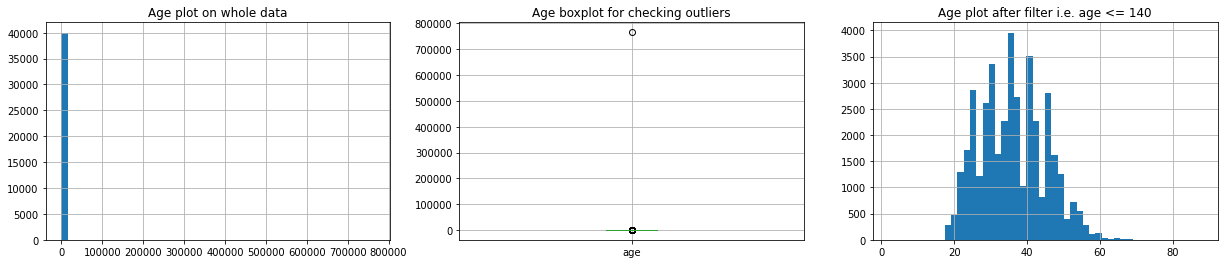

In [9]:
df_age = df[df['age'] <= 140]

fig, axes = plt.subplots(1, 3, figsize = (21,4))

df['age'].hist(bins=50, ax=axes[0])
df.boxplot(column=['age'], ax=axes[1])
df_age['age'].hist(bins=50,ax=axes[2])

axes[0].title.set_text('Age plot on whole data')
axes[1].title.set_text('Age boxplot for checking outliers')
axes[2].title.set_text('Age plot after filter i.e. age <= 140')
plt.show()

### 2. 'annual_income' column analysis

In [11]:
#df_cleaned['annual_income'].value_counts()

print("Count - annual_income = 0       :: ", len(df[df['annual_income'] == 0].index))
# There are 5702 person's/families having annual_income = 0, need to look in to that why so?
# May be information didn't captured correctly or if those are correct (then may be no earning member in family)


print("Count - annual_income >= 200000 :: ", len(df[df['annual_income'] >= 200000].index))
# Also, there are 25 people's with 'annual_income' >= 200000

Count - annual_income = 0       ::  5702
Count - annual_income >= 200000 ::  25


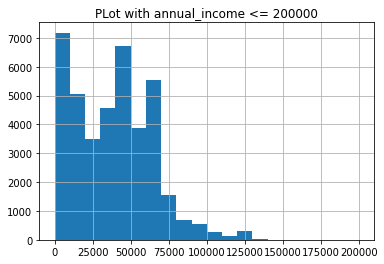

In [12]:
df_annual_income = df[(df['annual_income'] <= 200000)]
#sns.histplot(data=df_annual_income, x="annual_income", kde=True, bins=20)
df_annual_income['annual_income'].hist(bins=20)
plt.title("PLot with annual_income <= 200000")
plt.show()

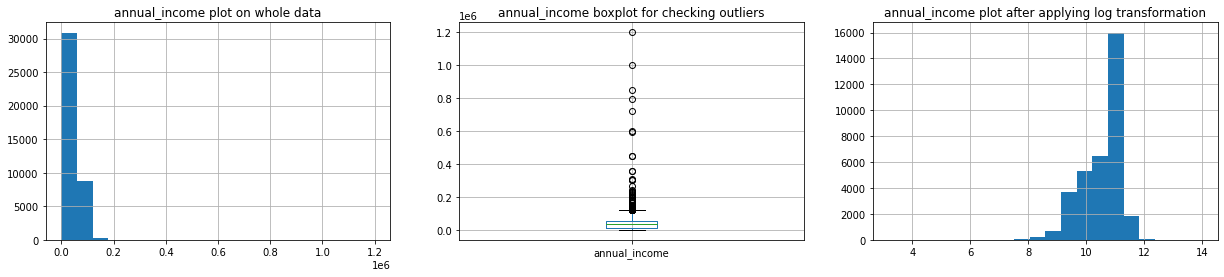

In [13]:
df_annual_income = df[df['annual_income'] > 0]
df_annual_income['annual_income'] = np.log(df_annual_income['annual_income'])

fig, axes = plt.subplots(1, 3, figsize = (21,4))

df['annual_income'].hist(bins=20, ax=axes[0])
df.boxplot(column=['annual_income'], ax=axes[1])
df_annual_income['annual_income'].hist(bins=20,ax=axes[2])

axes[0].title.set_text('annual_income plot on whole data')
axes[1].title.set_text('annual_income boxplot for checking outliers')
axes[2].title.set_text('annual_income plot after applying log transformation')
plt.show()

### 3. 'monthly_expenses' column analysis

In [14]:
df['monthly_expenses'].value_counts()

3000.0      6397
4000.0      6196
3500.0      3332
2000.0      3135
2500.0      2767
5000.0      2080
1500.0      1502
4500.0      1372
3200.0       771
3800.0       763
6000.0       733
4200.0       720
1000.0       575
4100.0       562
2200.0       557
3700.0       450
2800.0       430
3900.0       390
4300.0       384
3600.0       377
4400.0       325
3300.0       308
3400.0       278
5500.0       271
2700.0       255
7000.0       241
1800.0       225
8000.0       216
4150.0       191
1200.0       190
2300.0       164
4800.0       157
3100.0       155
4600.0       153
2400.0       144
2600.0       139
2900.0       133
4700.0       132
1700.0       130
60000.0      130
6500.0       130
9000.0       114
1300.0        87
1600.0        85
5200.0        84
2100.0        82
1900.0        80
4900.0        68
7500.0        61
800.0         58
10000.0       54
5600.0        52
5300.0        51
5700.0        50
5800.0        48
25000.0       46
1400.0        44
7800.0        41
6800.0        

In [15]:
#print(len(df_cleaned[df_cleaned['monthly_expenses'] >= 50000].index))

print("Count where monthly_expenses > annual_income :: ", len(df[df['monthly_expenses'] > df['annual_income']].index))
# Total of 5682 records where 'monthly_expenses' > 'annual_income'

print("Count where monthly_expenses = 0             :: ", len(df[df['monthly_expenses'] == 0].index))

Count where monthly_expenses > annual_income ::  5685
Count where monthly_expenses = 0             ::  0


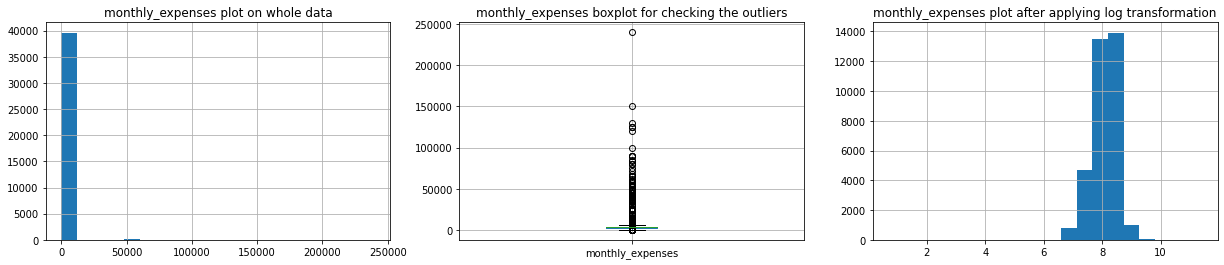

In [16]:
df_monthly_expenses = df[df['monthly_expenses'] < df['annual_income']]
df_monthly_expenses['monthly_expenses'] = np.log(df_monthly_expenses['monthly_expenses'])

fig, axes = plt.subplots(1, 3, figsize = (21,4))

df['monthly_expenses'].hist(bins=20, ax=axes[0])
df.boxplot(column=['monthly_expenses'], ax=axes[1])
df_monthly_expenses['monthly_expenses'].hist(bins=20,ax=axes[2])

axes[0].title.set_text('monthly_expenses plot on whole data')
axes[1].title.set_text('monthly_expenses boxplot for checking the outliers')
axes[2].title.set_text('monthly_expenses plot after applying log transformation')

plt.show()

### 4. 'occupants_count' column analysis

In [17]:
df['occupants_count'].value_counts()

4         10331
2          9461
3          8611
0          5268
5          2914
1          2454
6           689
7           154
8            57
10           26
9            16
600           5
12            2
300           2
15            2
900           1
100           1
450           1
11            1
400           1
250           1
700           1
950000        1
Name: occupants_count, dtype: int64

In [18]:
# We have max 'occupant_count' value as 950000
# Consider records only having occupants_count <= 10, we can ignore rest

### 5. 'house_area' column analysis

In [20]:
df['house_area'].value_counts()

0.0         5197
600.0       4740
300.0       3913
400.0       2740
500.0       2299
200.0       1700
800.0       1445
700.0       1243
250.0       1140
350.0       1043
1000.0      1006
900.0        953
100.0        787
450.0        645
650.0        599
4.0          530
1500.0       511
750.0        457
150.0        429
280.0        412
120.0        395
1200.0       333
1400.0       331
3.0          326
1600.0       324
5.0          269
112.0        261
1800.0       239
550.0        222
2000.0       206
850.0        202
1300.0       198
1700.0       186
240.0        185
320.0        173
220.0        168
180.0        157
360.0        138
110.0        124
1900.0       116
950.0        110
113.0        101
330.0        100
1450.0       100
340.0         96
380.0         84
625.0         84
420.0         84
480.0         80
370.0         80
1350.0        78
114.0         76
6.0           74
1100.0        66
2.0           64
540.0         57
210.0         55
125.0         53
130.0         

In [21]:
print("Count where house_area=0    :: ", len(df[df['house_area'] == 0].index))
print("Count where house_area<10   :: ", len(df[df['house_area'] < 10].index))
print("Count where house_area>3000 :: ", len(df[df['house_area'] > 3000].index))

Count where house_area=0    ::  5197
Count where house_area<10   ::  6531
Count where house_area>3000 ::  238


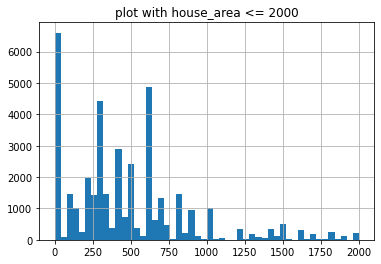

In [22]:
df_house_area = df[df['house_area'] <= 2000]
df_house_area['house_area'].hist(bins=50)
plt.title("plot with house_area <= 2000")
plt.show()

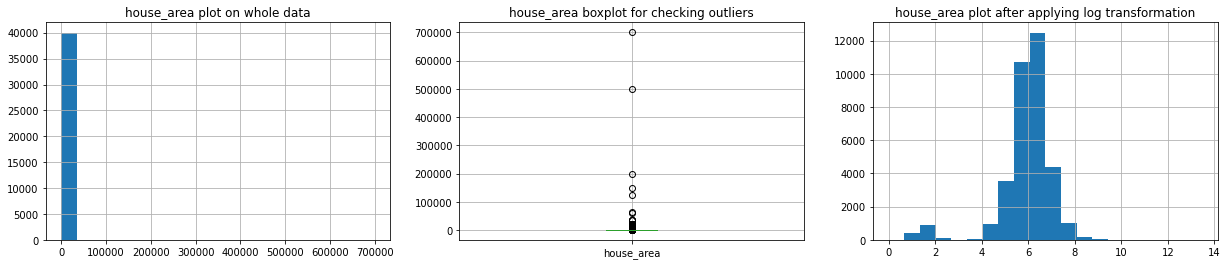

In [23]:
df_house_area = df[df['house_area'] > 0]
df_house_area['house_area'] = np.log(df_house_area['house_area'])

fig, axes = plt.subplots(1, 3, figsize = (21,4))

df['house_area'].hist(bins=20, ax=axes[0])
df.boxplot(column=['house_area'], ax=axes[1])
df_house_area['house_area'].hist(bins=20,ax=axes[2])

axes[0].title.set_text('house_area plot on whole data')
axes[1].title.set_text('house_area boxplot for checking outliers')
axes[2].title.set_text('house_area plot after applying log transformation')
plt.show()

### 6. 'old_dependents' column analysis

In [24]:
df['old_dependents'].value_counts(normalize=True)

# cose to 96% zero old dependents

0    0.958275
1    0.038575
2    0.003125
3    0.000025
Name: old_dependents, dtype: float64

### 7. 'young_dependents' column analysis

In [25]:
df['young_dependents'].value_counts(normalize=True)

# close to 90% having 0,1 or 2 young dependents

0    0.369425
2    0.284600
1    0.245925
3    0.081725
4    0.015500
5    0.002250
6    0.000475
7    0.000100
Name: young_dependents, dtype: float64

### 8. 'sanitary_availability' column analysis

In [431]:
df['sanitary_availability'].value_counts(normalize=True)

 1.0    0.686394
 0.0    0.313581
-1.0    0.000025
Name: sanitary_availability, dtype: float64

### 9. 'water_availabity' column analysis

In [26]:
df['water_availabity'].value_counts(normalize=True)

 1.0    0.511756
 0.5    0.482977
 0.0    0.005238
-1.0    0.000029
Name: water_availabity, dtype: float64

### 10. 'loan_tenure' column analysis

In [27]:
df['loan_tenure'].value_counts(normalize=True)

## 98% people having loan_tenure of 12 montha

12    0.982350
6     0.009550
24    0.006100
15    0.001325
14    0.000250
18    0.000150
48    0.000100
3     0.000050
72    0.000050
84    0.000050
60    0.000025
Name: loan_tenure, dtype: float64

### 11. 'loan_installments' column analysis

In [28]:
df['loan_installments'].value_counts(normalize=True)

## For 72% people total of 12 installments
## for 25% people total of 50 installments

12    0.724500
50    0.252425
6     0.008600
24    0.005800
2     0.002350
51    0.001850
15    0.001325
53    0.000725
55    0.000625
4     0.000375
8     0.000300
74    0.000275
58    0.000250
18    0.000150
52    0.000150
48    0.000100
72    0.000050
1     0.000050
84    0.000050
0     0.000025
60    0.000025
Name: loan_installments, dtype: float64

### 12. 'loan_amount' column analysis

In [30]:
print("Count where loan_amount > 30000 :: ", len(df[df['loan_amount'] > 30000].index))

Count where loan_amount > 30000 ::  66


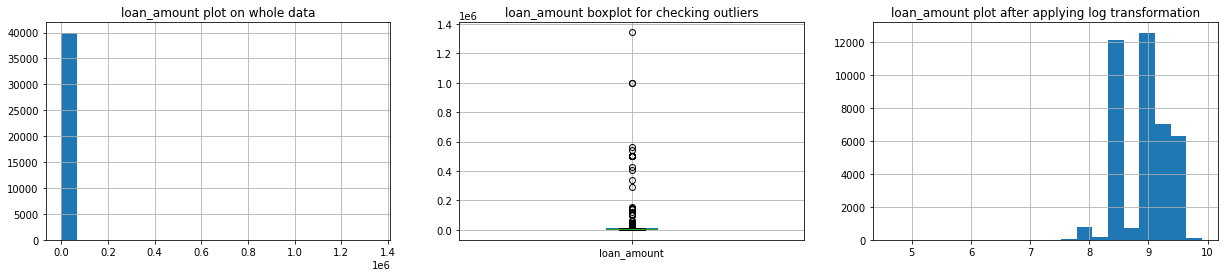

In [35]:
df_loan_amount = df[df['loan_amount'] < 30000]
df_loan_amount['loan_amount'] = np.log(df['loan_amount'])

fig, axes = plt.subplots(1, 3, figsize = (21,4))

df['loan_amount'].hist(bins=20, ax=axes[0])
df.boxplot(column=['loan_amount'], ax=axes[1])
df_loan_amount['loan_amount'].hist(bins=20,ax=axes[2])

axes[0].title.set_text('loan_amount plot on whole data')
axes[1].title.set_text('loan_amount boxplot for checking outliers')
axes[2].title.set_text('loan_amount plot after applying log transformation')
plt.show()

## Null value check

In [32]:

## Function for checking percentage of null values in dataframe columns

def null_value_check_in_dataframe(df):
    
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})

    return missing_value_df

df_null = null_value_check_in_dataframe(df)
df_null

,column_name,percent_missing
Id,Id,0.0000
city,city,4.6600
age,age,0.0000
sex,sex,0.0000
social_class,social_class,13.1375
primary_business,primary_business,0.0650
secondary_business,secondary_business,13.1025
annual_income,annual_income,0.0000
monthly_expenses,monthly_expenses,0.3000
old_dependents,old_dependents,0.0000


## Functions

In [36]:
# Function to calculate percentage distribution og categorical columns
def percentageDistribution(df, columnNameList):
    
    for column in columnNameList:
        print("------"*9)
        print(column + " column - top 10 values percentage distribution" + "\n" + "---------------------------"*2)
        df_distribution = round(df[column].value_counts() / len(df)*100, 2)
        print(df_distribution.head(10))
        print("\n")
    
    
# Function for calculating the mean, median and mode of column values (in order to check for the normal distribution)
def normalityCheck(df, columnNameList):
    
    for column in columnNameList:
        print("------"*4)
        print(column + " column" + "\n" + "-----------------------")
        print("Mean   :: ", str(df[column].describe()['mean']))
        print("Median :: ", str(df[column].describe()['50%']))
        print("Mode   :: ", str(df[column].mode()[0]))
        print("\n")
        
        
# Function for getting count of unique vqlues in categorical variables
def uniqueValueCount(df, columnNameList):

    print("Distinct categories count\n-----------------------------------------")
    
    for column in columnNameList:
        print("Count with nan values - ", column , ' :: ', str(len(df[column].unique())))
        print("Count without nan values - ", column , ' :: ', str(df[column].nunique()))
        print("\n")

## Column list based on data types

In [37]:
## Numerical column list
num_column_list = df.select_dtypes(include=np.number).columns.tolist()

## Numerical column list
categorical_column_list = list(df.select_dtypes('object').columns)

## Measures of Central Tendency (or Normal distribution check)

In [39]:
## Normality check for all the numeric columns
#normalityCheck(df, num_column_list)

## After filtering age <=140, it is almost normal distribution
normalityCheck(df_age, ['age'])

## After filtering annual_income <=200000, it is almost normal distribution
normalityCheck(df_annual_income, ['annual_income'])

## After filtering monthly_expenses < annual_income, it is close to normal distribution
normalityCheck(df_monthly_expenses, ['monthly_expenses'])

## After filtering house_area <=2000, it is close to normal distribution
normalityCheck(df_house_area, ['house_area'])

## After filtering house_area < 30000, it's near to normal distribution
normalityCheck(df_loan_amount, ['loan_amount'])

------------------------
age column
-----------------------
Mean   ::  35.99764982373678
Median ::  35.0
Mode   ::  35


------------------------
annual_income column
-----------------------
Mean   ::  10.509434870007937
Median ::  10.778956289890028
Mode   ::  10.778956289890028


------------------------
monthly_expenses column
-----------------------
Mean   ::  8.086853626688312
Median ::  8.160518247477505
Mode   ::  8.294049640102028


------------------------
house_area column
-----------------------
Mean   ::  5.947730227138299
Median ::  6.1092475827643655
Mode   ::  6.396929655216146


------------------------
loan_amount column
-----------------------
Mean   ::  8.928357309851036
Median ::  8.987196820661973
Mode   ::  8.517193191416238




## Percentage distribution of categorical column values

In [40]:
## Percentage distribution of categorical column values
percentageDistribution(df, categorical_column_list)

------------------------------------------------------
city column - top 10 values percentage distribution
------------------------------------------------------
Pusad            7.89
Bahoriband       4.95
PUSAD            4.44
Shantipur        4.32
Imphal           4.25
Mathurapur       3.40
SANDESHKHALI     2.72
Joynagar         2.48
Gwalior          2.38
Kozhinjampara    2.24
Name: city, dtype: float64


------------------------------------------------------
sex column - top 10 values percentage distribution
------------------------------------------------------
F     94.06
M      5.93
TG     0.02
Name: sex, dtype: float64


------------------------------------------------------
social_class column - top 10 values percentage distribution
------------------------------------------------------
OBC               26.71
SC                 7.84
ST                 6.54
General            5.75
Muslim             4.36
S.C                2.38
Minority           2.23
Hindu              2.17
GC

## Unique value counts in categorical columns

In [41]:
uniqueValueCount(df, categorical_column_list)

Distinct categories count
-----------------------------------------
Count with nan values -  city  ::  857
Count without nan values -  city  ::  856


Count with nan values -  sex  ::  3
Count without nan values -  sex  ::  3


Count with nan values -  social_class  ::  520
Count without nan values -  social_class  ::  519


Count with nan values -  primary_business  ::  442
Count without nan values -  primary_business  ::  441


Count with nan values -  secondary_business  ::  6
Count without nan values -  secondary_business  ::  5


Count with nan values -  type_of_house  ::  4
Count without nan values -  type_of_house  ::  3


Count with nan values -  loan_purpose  ::  38
Count without nan values -  loan_purpose  ::  37




## Correlations

### 1. Correlation among numeric variables

#### 1.1 Pearson correlation

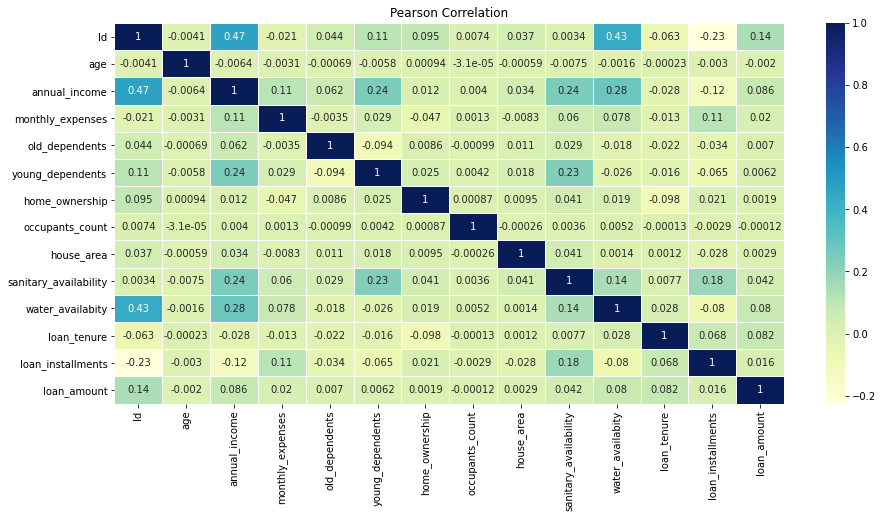

In [44]:
pearson_corr = df[num_column_list].corr(method='pearson')

# plot the heatmap
fig, axes = plt.subplots(1, 1)

fig.set_figheight(7)
fig.set_figwidth(15)

# cmap = sns.diverging_palette(500, 10, as_cmap=True)
# sns.heatmap(pearson_corr, 
#         xticklabels=pearson_corr.columns,
#         yticklabels=pearson_corr.columns,
#         linewidths=1, cmap=cmap, center=0, annot=True)

sns.heatmap(pearson_corr, cmap="YlGnBu", annot=True, linewidths=1)
plt.title("Pearson Correlation")
plt.show()

#### 1.2 Spearman correlation

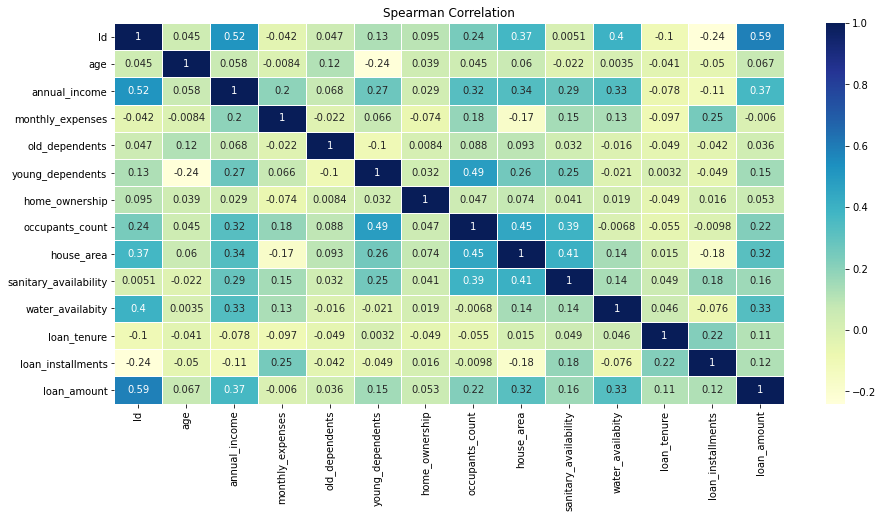

In [45]:
spearman_corr = df[num_column_list].corr(method='spearman')

# plot the heatmap
fig, axes = plt.subplots(1, 1)

fig.set_figheight(7)
fig.set_figwidth(15)

sns.heatmap(spearman_corr, cmap="YlGnBu", annot=True, linewidths=1)
plt.title("Spearman Correlation")
plt.show()

### 2. Correlation among categorical variables

#### 2.1. Cramer's V

In [46]:
import scipy.stats as ss

def cramers_v(x, y):
    
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

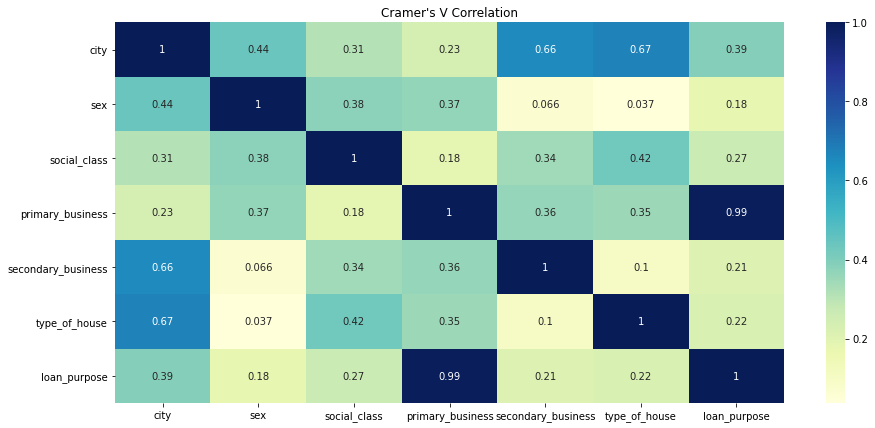

In [47]:
cramers_v_corr = pd.DataFrame()

for column1 in categorical_column_list:
    for column2 in categorical_column_list:
        score = cramers_v(df[column1], df[column2])
        cramers_v_corr.loc[column1,column2] = score

        
# plot the heatmap
fig, axes = plt.subplots(1, 1)

fig.set_figheight(7)
fig.set_figwidth(15)

sns.heatmap(cramers_v_corr, cmap="YlGnBu", annot=True)
plt.title("Cramer's V Correlation")
plt.show()

#### 2.1. Theil’s U

In [48]:
from collections import Counter
import math

def conditional_entropy(x,y):
    
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy, math.e)
        
    return entropy


def theils_u(x, y):
    
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

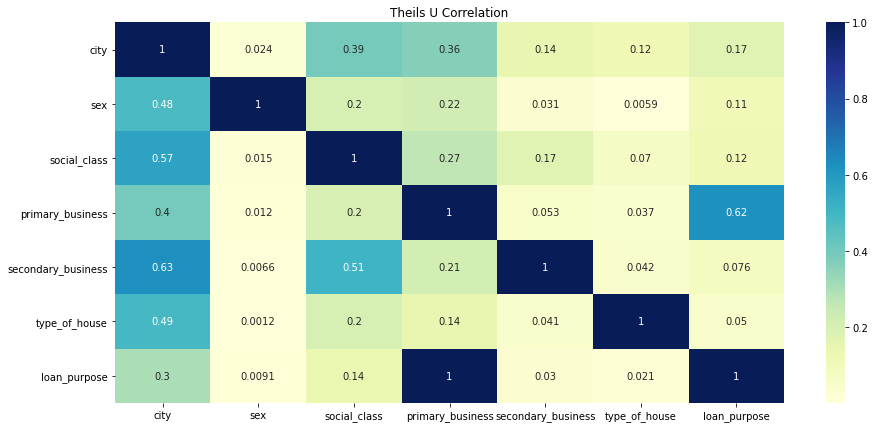

In [49]:
theils_u_corr = pd.DataFrame()

for column1 in categorical_column_list:
    for column2 in categorical_column_list:
        score = theils_u(df[column1], df[column2])
        theils_u_corr.loc[column1,column2] = score

        
# plot the heatmap
fig, axes = plt.subplots(1, 1)

fig.set_figheight(7)
fig.set_figwidth(15)

sns.heatmap(theils_u_corr, cmap="YlGnBu", annot=True)
plt.title("Theils U Correlation")
plt.show()

### 3. Correlation among numeric and categorical variables

In [50]:
def correlation_ratio(categories, measurements):
    
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        
        y_avg_array[i] = np.average(cat_measures)
        
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
        
    return eta

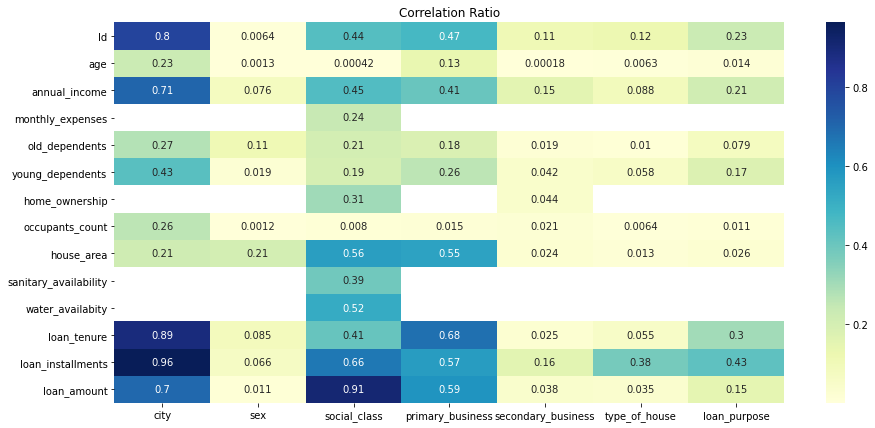

In [51]:
corr_ratio = pd.DataFrame()

for column1 in num_column_list:
    for column2 in categorical_column_list:
        score = correlation_ratio(df[column2], df[column1])
        corr_ratio.loc[column1,column2] = score

        
# plot the heatmap
fig, axes = plt.subplots(1, 1)

fig.set_figheight(7)
fig.set_figwidth(15)

sns.heatmap(corr_ratio, cmap="YlGnBu", annot=True)
plt.title("Correlation Ratio")
plt.show()

In [ ]:
df["sex"].value_counts(normalize=True).plot.bar(title = 'Sex')
plt.show()